In [2]:
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import scipy
import warnings
import seaborn as sns
import warnings
import pandas as pd, numpy as np, pickle


# Load data

In [7]:
df_A = pd.read_csv('data/sample_feature_2D_A.csv')
df_B = pd.read_csv('data/sample_feature_2D_B.csv')
df_A_B = pd.read_csv('data/sample_feature_2D_A+B.csv')

In [8]:
df_A

,formula,Layer Group,Layer Group Number,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,Md,No,Lr,NComp,TotalAtomNumber,MaximumAtomNumber,MinimumAtomNumber,AverageAtomNumber,SpecificValue,AtomNumberVariance
0,BrIPtZrS2,p1,1,Br1 I1 Pt1 Zr1 S2,16,78,62,39.666667,17.333333,16,...,0,0,0,5,6,2,1,1.200000,1,0.004444
1,PdNi3S3Se5,p1,1,Pd1 Ni3 S3 Se5,16,46,30,29.000000,7.000000,34,...,0,0,0,4,12,5,1,3.000000,1,0.013889
2,SeS3I4Pt4,p1,1,Se1 S3 I4 Pt4,16,78,62,50.500000,20.000000,53,...,0,0,0,4,12,4,1,3.000000,1,0.010417
3,Br2Re6S8,p-1,2,Br2 Re6 S8,16,75,59,40.500000,25.875000,16,...,0,0,0,3,16,8,2,5.333333,2,0.024306
4,Br2Re6Se8,p-1,2,Br2 Re6 Se8,34,75,41,49.500000,19.125000,34,...,0,0,0,3,16,8,2,5.333333,2,0.024306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,B2Cl2Hf3,p-6m2,78,B2 Cl2 Hf3,5,72,67,37.142857,29.877551,72,...,0,0,0,3,7,3,2,2.333333,1,0.004535
146,B2Cl2Ta3,p-6m2,78,B2 Cl2 Ta3,5,73,68,37.571429,30.367347,73,...,0,0,0,3,7,3,2,2.333333,1,0.004535
147,Zr2Br6,p-62m,79,Zr2 Br6,35,40,5,36.250000,1.875000,35,...,0,0,0,2,8,6,2,4.000000,2,0.062500
148,Zr2Cl6,p-62m,79,Zr2 Cl6,17,40,23,22.750000,8.625000,17,...,0,0,0,2,8,6,2,4.000000,2,0.062500


In [9]:
# prepare X and y
X = df_A.iloc[:, 4:].fillna(0)
yall = df_A.iloc[:, 2].fillna(0)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier

# encode y to consecutive integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(yall)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, random_state=41, stratify=y_encoded)

# train a lightGBM model
clf = LGBMClassifier(n_estimators=10000,
                     learning_rate=0.05,
                     num_leaves=32,
                     colsample_bytree=0.8,
                     subsample=0.9,
                     max_depth=8,
                     reg_alpha=0.08,
                     reg_lambda=0.01,
                     min_split_gain=0.01,
                     min_child_weight=2,
                     verbose=-1,
                     seed=71)

clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='multi_error', early_stopping_rounds=75, verbose=False)
y_pred = clf.predict(X_test)

# calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted',zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted',zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Accuracy: 0.0133
Precision: 0.0002
Recall: 0.0133
F1 Score: 0.0004


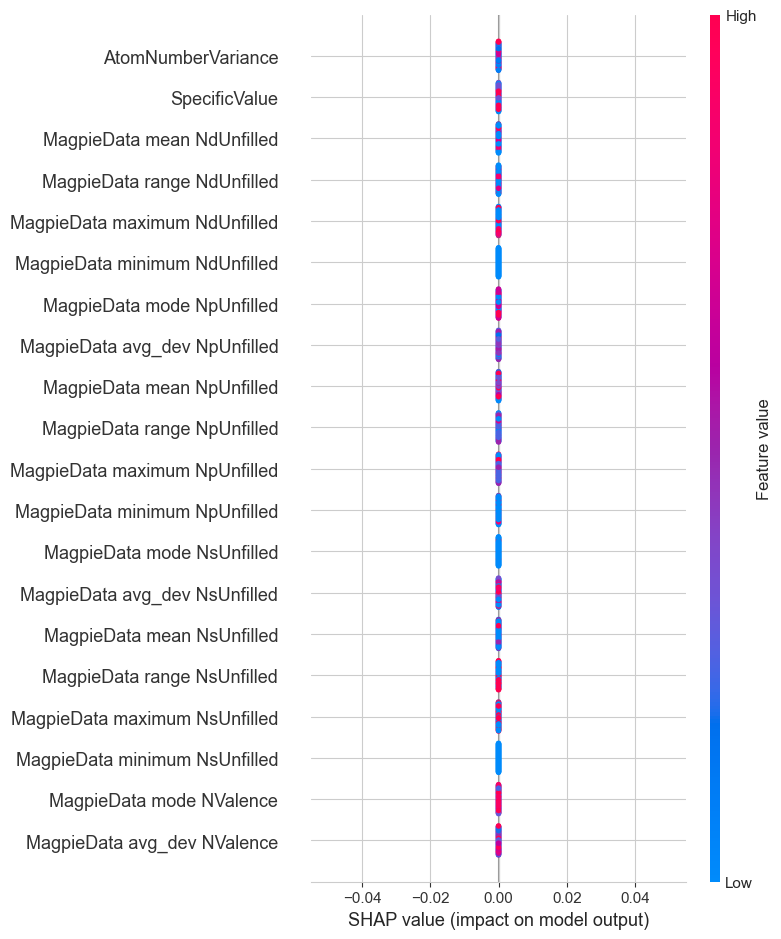

In [14]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

X_train_df = pd.DataFrame(X_train)
feature_names = X_train_df.columns.tolist()
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[:,:,0], X_test, feature_names=feature_names)

average_shap_values = np.mean(shap_values, axis=2)
# shap.summary_plot(average_shap_values, X_test, feature_names=feature_names, show=False)
shap.summary_plot(shap_values[:,:,1], X_test, feature_names=feature_names, show=False)

plt.show()


In [ ]:
# predict